# Geological section maker app

### (To start using the app, scroll down past the tutorial and run the cell below)

#### If the images in this user guide do not display correctly, check if you have downloaded the *App_screenshots* folder and placed it in the same directory as this Notebook

This application was inspired by a Planetary Mapping course at the Chieti-Pescara University, with an intention to create a tool that would provide an alternative to a more manual approach to drawing interpretative geological sections, in which the user would create them by means of pressing buttons and dragging some sliders only. Any bugs discovered while using the app can be reported to jm.morawski@gmail.com. An overview of the main functionalities of the app can be found below:

## Summary of available hotkeys 

#### Placed here for ease of referring to when interacting with the application. To read the actual full user guide, start reading from "Welcome screen"

(see section **About hotkeys** in chapter **Adding and customizing layers** for an explanation)

**E** - add a control point to an active layer, right of the active control point 

**W** - add a control point to an active layer, left of the active control point 

**Arrow keys** - move a control point up, down, to the left or to the right

**A** - change the active control point one to the left

**D** - change the active control point one to the right

**X** - delete the active control point

**Q** - toggle linear/quadratic interpolation mode for the active layer

**C** - change the color of the active layer

**[** - change the active layer by one down

**]** - change the active layer by one up

**H** - hide/reveal the delineation curves of layers, including the highlighted curve of the active layer

**J** - hide/reveal the highlighted curve of the active layer

**K** - hide/reveal the delineation curves of layers, except the highlighted curve of the active layer

--------------------- **EXPERIMENTAL** ------------------------------------

**-** - move active layer down

**=** move active layer up

These last two functions have been implemented as hotkey-triggered only and there are no buttons to call them as their behavior is currently somewhat unstable.

The idea is to change the place of the current layer in the list of layers (puch it below, or abve it's neighbour, in terms of stratigraphic relationships), without changing it's delineating curve. This can obviously change the appearence of the plot significantly, and can be helpful for someone who had already meticulously created their layers, but then realized that one of them is actually more likely, from the geological perspective, to be younger than the one above it (or older than the one below it). This is a desirable feature of the application, but at the moment leads to some erratic behavior, with the plots not looking quite as expected after moving layers around. Use with caution. However, some experimentation seems to suggest that if you go up and down along the whole list of layers using the **]** and **[** hotkeys, after moving your layers around, the plot should again look as expected.

## Welcome screen

<img src="./App_screenshots/Welcome_screen_line1.png" alt="Welcome screen" width=600px>

Before starting to work within the ***Geological section maker***, you need to have a text file with some data extracted from a linear section along a Digital Elevation Model (DEM) of the site of interest. In the uppermost part of the welcome screen you can provide the application with essential information on how to interpret the data file(s) which you will feed to it:

**x data column** - a number of a column within the file in which the abscissa (measured in meters along the section line) values are stored

**y data column** - a number of a column within the file in which the corresponding DEM values are stored

**Header lines** - Number of header lines to be dismissed when parsing the file content

Default values of $6$, $7$ and $1$ correspond to the data format as outputted by the ***qProf*** QGIS plugin. If using a differrent tool, you might need to change them using the dropdown menus.

<img src="./App_screenshots/Welcome_screen_line3.png" alt="Welcome screen" width=700px>

In the third line, there are additional settings determining how your section will appear:

**Section plot width (px)** - Width of your plot in pixels, must be an integer. Default value is such that the second application window would occupy most of a regular HD resolution screen.

**Vertical exagerration** - The factor of vertical exagerration (VE), must be a positive real number. Each time a new data file is loaded, this field will be overwritten by a value computed so as to optimize the space occupied by the plot in the app screen. If a different  value is preferred, you need to type it manually before proceeding to **Draw**. Increasing VE the automatically computed may lead to undesireable appearance of the second application window.

**Section line name** - how it will appear in the title of the plot. Should correspond to the way you name the two end points of the section line on your map.  

<img src="./App_screenshots/Welcome_screen_line2.png" alt="Welcome screen" width=700px>

To load the section topography data, press the **Load profile data file** button. You will be able to pick a file of your choice, which, provided that it is in the correct format, will be read by the program and saved into relevant variables. 

<img src="./App_screenshots/Welcome_screen_draw.png" alt="Welcome screen" width=700px>

Once at least one file is uploaded, you will be able to proceed to the second window by pressing **Draw**. However, there is also a possibility to upload more data files, corresponding to a continuation of the same section. It may be necessary if your section line passed through multiple DEMs. The suggested value of vertical exagerration will be updated each time, adapting to the size of the abscissa range of the section. 

<img src="./App_screenshots/Welcome_screen_load.png" alt="Welcome screen" width=700px>

The **Load saved progress** button can be used to resume working on a section by calling a text file in which all the necessary information was saved when previously working with ***Geological section maker***. When loading saved progress, do not change any of the other settings, but rather press this button directly - all the relevant information about your plot will be read directly from the file.  

## Drawing window


<img src="./App_screenshots/Second_window.png" alt="Drawing window" width=1000px>

Once some data is uploaded and the button **Draw** is pressed, you will be moved to another workspace which should look more or less like this. A plot of the topography along the section is provided, together with a dashed line indicating a linear interpolation which fills the gaps in places where the data is missing. Notice that in this example a section came from two separate data files probing two different DEMs and there was a gap between them - hemce a long dashed segment around $20000$ m. 

From here, you can start adding layers into your section with the **Add layer** button. However, if you realise that you forgot to change the VE, plot width, section name or upload an additional data file, you can press the **↵** button instead. It will bring you back to the welcome screen, where you can make the changes necessary, then press **Draw** again. In it's current form the application does not have the ability to remove data files already loaded, therefore, if your plot looks wrong becuase of incorrect input file selection, you will have to start over by shutting down and relaunching the app. Be aware that using the **↵** button is only possible before adding the first layer into your section. If you realize a fundamental setting mistake later, you will also have to start over from the beginning.

### Adding and customizing layers

<img src="./App_screenshots/Second_window_add_layer.png" alt="Drawing window" width=1000px>

The concept of the workflow is to create a stack of layers defined by their delineating upper lines (curves), which are adjusted by means of tweaking their control points. Each layer will have it's own name, color, and optional hatch (e. g. dashed or dotted filling, valid options are |,/\,O,X,o,x,*,+,-,. or any collection of these characters). For any $n>0$, the area shown in the color and hatch of the $n^{th}$ layer on the plot will be the set of points $(x,y)$ such that $l_{n-1}(x)<y<l_n(x)$, where $l_i$ is the upper delineating curve of the $i^{th}$ layer, with $l_0$ referring to the bottom of the plot. Notice that the delineating curve of a layer can go below the base of the plot or the curve delineating the previous layer - in the intervals of the $x$ range where this will be the case, this layer simply won't be shown.     

Any new $n^{th} $layer is added with a single control point, which defines the height of the delineating curve (defaults to halfway between the uppermost point of $l_{n-1}$ and the highest point of the topography along the section). Keeping all layers like this will correspond to an interpretation of horizontal strata. Moving the initial control point to the right corresponds to absecnce of a given fascies left of that point in the section. If finer shapes are desired, more control points can be added.

#### About hotkeys

Some of the workflow is relatively slow when performed with pressing buttons, and an alternative of using **hotkeys** is provided for those functions which need to be used extensively. For example, the addition of a control point to an active layer can be achieved both with an appropriate button and by pressing **L** on the keyboard. Whenever available, the hotkeys will be provided next to the functionalities described below. A full list of hotkeys is also provided in the beginning of this tutorial.

The use of hotkeys requires for all the text input fields to be deactivated, otherwise the keyboard input could be interpreted in abmiguous ways by the computer. If you need to access those fields, press **Change legend name**, **Change hatch**, **Change export file name** or **Change save file name**, depending on the field you want to modify. You will get access to modify the text within the field, but the hotkeys will in turn become deactivated. Disable all text input fields after making desired changes to them in order to be able to use hotkeys again.

#### Adding control points (E/W)

<img src="./App_screenshots/Second_window_add_point.png" alt="Drawing window" width=1000px>

The **+** button in the application creates a new control point:
- If it is a second point created, it will be positioned on the very right of the plot, at the same height as the first point. Modifying it's position will result in a representation of the layer as an inclined stratum of fixed dip angle. The same can be achieved with the hotkey **E**.
- If there are already $2$ points or more, and the current active point is not the rightmost one, a new point will be created halfway between the currently active point and it's nearest neighbour to the right. The same can be achieved with the hotkey **E**.
- If there are already $2$ points or more, and the current active point is the rightmost one, a new point will be created halfway between the currently active point and it's nearest neighbour to the left. The same can be achieved with the hotkey **W**.

Generally, the hotkey **E** creates a control point to the right, and the hotkey **W** to the left of the currenty active point, provided that the active point is not the rightmost, or leftmost, respectively (in which case the pressing of the key is ignored). The button **+** has, except for the one special case, the same effect as the hotkey **E**, whereas there is no general equivalent to the hotkey **W** in the button-based interface.

The newly created point becomes the new active point, highlighted with a red plus (or black, if it is the first or last control point of $l_n$)

#### Moving the control points (arrow keys)

<img src="./App_screenshots/Second_window_move_point.png" alt="Drawing window" width=1000px>

Let us denominate the control points of a curve $l_n$ as $p_{n,1},p_{n,2},..,p_{n,m_n}$, where $m_n$ is the number of currently defined control points of the $n^{th}$ layer's curve. If a position of any such point $p_{a,b}$ is $\left(x_{p_{a,b}},y_{p_{a,b}}\right)$, then a condition is set that $\forall_{n\in\mathbb{N}^+}\forall_{k\in\{1,2,..,m_n\}}x_{p_{n,k-1}}<x_{p_{n,k}}<x_{p_{n,k+1}}$, where $x_p{n,0}$ and $x_p{n,n_m+1}$ correspond to the leftmost and rightmost ends of the section's abscissa range. In other words, the control points remain segragated in terms of increasing abscissa. There are no constraints on the ordinate, other then fitting within the range of the plot. The movement of the points within the constraints can be achieved in two ways:
- For large movement, it is recommended to use the horizontal and vertical sliders highlighted on the screenshot shown above. The setting of the sliders will always be interpreted as a percentage of the range of the given coordinate for the given control point (see contraint on abscissa described above). When the active point changes, the setting of the sliders will always jump to accurately reflect their position within the currently availabe range.
- For fine tuning, use arrow keys to move the point around. It is not advised for larger movements as it will cause significant lags. The arrow key input will be ignored if trying to push a given point outside of it's currently permitted abscissa range.

#### Changing active point (A/D)

<img src="./App_screenshots/Second_window_change_point.png" alt="Drawing window" width=1000px>

The navigation between the control points is done by changing the active point by one to the right or to the left (in the notation from above, it would mean activating the point $p_{n,m'}=p_{n,m\pm1}$, where $n$ is the number of the active layer, and $m$ is the index of the previousl active point (assuming the operation is possible, that is $m'\in\left\{1,2,...,m_n\right\}$. This can be schieved with the two buttons highlighted on the screenshot above, but it is far more efficient to use the hotkeys, **A** to move one point to the left, and **D** to move one point to the right.

#### Removing a point (X)

<img src="./App_screenshots/Second_window_remove_point.png" alt="Drawing window" width=1000px>

By pressing the **-** button or by using the hotkey **X**, you can remove the currently active control point. Cannot be done for the leftmost point of the active layer's control point ($p_{n,1}$).

#### Interpolation (Q)

<img src="./App_screenshots/Second_window_interpolation.png" alt="Drawing window" width=1000px>

For $m_n\geqslant3$, it is possible to apply quadratic interpolation between the control points to achieve a smoother looking curve. To switch between linear and quadratic interpolation, use the radio buttons indicated on the screenshot above, or the hotkey **Q**. If control points are subsequently removed so that only $2$ remain, the application will automatically revert to linear interpolation for this layer.

#### Changing the color of the active layer (C)

<img src="./App_screenshots/Second_window_color.png" alt="Drawing window" width=1000px>

Use the hotkey **C** or press the button showing the current color (see screenshot above), in order to change the color of the layer. The Tkinter Color Chooser window will open, where you can adjust the color by using the sliders or by manually typing the #RRGGBB hex code (you will likely want to copy paste it from your map coloring in QGIS). When modifying the string, make sure it has been properly changed in the input field, sometimes if the string is not modified correctly the change does not take place and you need to start over.

#### Changing the hatch of the active layer

<img src="./App_screenshots/Second_window_hatch.png" alt="Drawing window" width=1000px>

If, instead of compete filling, you want to use a hatch of any sort, such as in the example above, press the **Change hatch** button, which will then turn into a **Fix hatch** button. You can type in any combination of |,/\,O,X,o,x,*,+,-,. characters, such as in the example above. The appearance of the layer will update live as you manipulate the string. Once satisfied, press **Fix hatch** to settle on a choice, deactivate the text input window, and reactivate the availabiltiy of hotkeys.

#### Changing the name of the active layer

<img src="./App_screenshots/Second_window_layer_name.png" alt="Drawing window" width=1000px>

The change of the name with which the layer will appear in the plot, can be achieved analogously to changing the hatch, as shown in the example above.

### Removing layers

<img src="./App_screenshots/Second_window_delete_layer.png" alt="Drawing window" width=1000px>

Press the **Delete** button of a given layer to permanently delete it. Only available when there are multiple layers.

### Changing the active layer ([/])

<img src="./App_screenshots/Second_window_change_active_layer.png" alt="Drawing window" width=1000px>

The active layer will be highlighted in the column indicated on the screenshot above with an inactive **┈➤** button. To change the active layer, press the button with the pencil icon next to the layer you wish to activate.

The application can only display the controls for up to $5$ layers at the same time. If more layers have been created, such as in the example above, you can use the arrow butons shown with the red ellipse on the screenshot to navigate up and down along the layer list.

You can also use the hoteys: **]** to change the active layer by one up, and **[** to change the active layer by one down  

### Layer delineation line appearance on the plot (H/J/K)

<img src="./App_screenshots/Second_window_hide.png" alt="Drawing window" width=1000px>

The delineation curves help you design your section, but you do not want them to be shown on the final output plot. 

To hide/show the delineation curves of all layers (except the highlighted curve of the active layer, which is red and contains the control points), as in the example above, uncheck/check the **Show layer boundaries** box, or use the hotkey **K**.

To hide/show the highlighted curve of the active layer, uncheck/check the **Highlight active layer boundary** box, or use the hotkey **J**.

The hotkey **H** will hide both if either is currently visible, or reveal both if they were both hidden.

### Exporting the plot

<img src="./App_screenshots/Second_window_save_fig.png" alt="Drawing window" width=1000px>

Once happy with the geological section plot, hide layer boundaries and export the plot using the button **Export plot**. Change the name for the output file according to your needs (if always left to default, you will keep overwriting the same file ***test_profile.png***). If you do not provide the extension in the file name input box, *.png* will be assumed by default. 

Sometimes you might want to hide some layers in your plot. For example, maybe you want to create an animation or separate slides in your presentation with different layers highlighted, or sequentially added, so you need dedicated figures for that. To generate such intentionally incomplete plots, uncheck the **Show** boxes next to the layers you want to hide, before exporting the plot, as done for the uppermost $3$ layers in the example above (see the dark arrow on the screenshot). Be sure to change the export file name each time. In principle, you can also hide some layers in this manner during your work on the plot earlier on, but there is probably no reason to ever do so.  

### Saving progress to resume later

<img src="./App_screenshots/Second_window_save_progress.png" alt="Drawing window" width=1000px>

A standard **Ctrl+S** will **NOT** save your progress, but an equivalent can be achieved by saving all the information about the section in it's current shape in a text file, which can be done in the space indicated on the screenshot above in a manner analogous to the export of the plot itself. The generated file can then be read by the application, as explained at the end of the **Welcome screen** section of this manual.

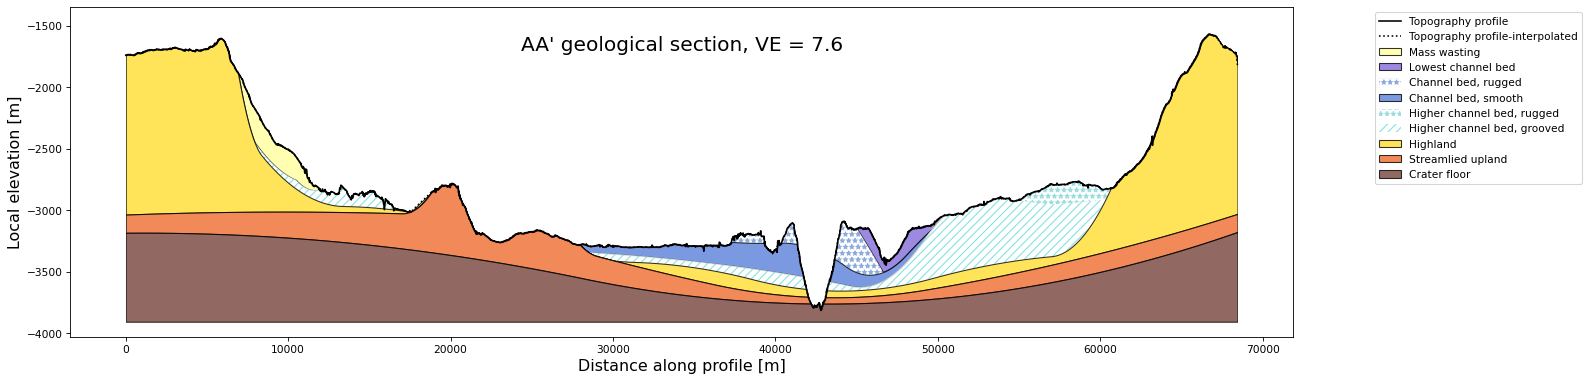

In [7]:
import tkinter as tk
from tkinter import Entry, Button, Label, Toplevel, ttk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.patches as patches
from scipy import interpolate
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image, ImageTk
from tkinter.colorchooser import askcolor
import tkinter.filedialog 
import matplotlib.cm as cm

def check_valid_hatch(stringy):
    if stringy=="":
        valid=False
    else:
        for ch in stringy:
            if ch=="|":
                valid=True
            elif ch=="/":
                valid=True
            elif ch=="\\":
                valid=True
            elif ch=="O":
                valid=True
            elif ch=="X":
                valid=True
            elif ch=="o":
                valid=True
            elif ch=="x":
                valid=True
            elif ch=="*":
                valid=True
            elif ch=="+":
                valid=True
            elif ch=="-":
                valid=True
            elif ch==".":
                valid=True
            else:
                valid=False
                break
    return valid

class SectionsApp(tk.Tk):
    def __init__(self):
        self.X=np.array([])
        self.Y=np.array([])
        tk.Tk.__init__(self)
        self._frame = None
        self.number_of_files=0
        self.switch_frame(StartPage)
        self.plot_width=1500
        self.VE=15
        self.interpolation_resolution=1000
        
    def switch_frame(self, frame_class):
        new_frame = frame_class(self)
        if self._frame is not None:
            self._frame.destroy()
        self._frame = new_frame
        self._frame.grid()
        
class StartPage(tk.Frame):
    def __init__(self, master):
        tk.Frame.__init__(self, master)
        self.master = master
        master.title("Geological section maker")
        master.geometry("650x200")  # Initial size of the main window
        style = ttk.Style()
        style.configure("TButton", padding=(10, 5), font=('Helvetica', 12))
        style.configure("TLabel", font=('Helvetica', 12))
        style.configure("TEntry", font=('Helvetica', 12))

        self.x_col_label = ttk.Label(self, text="x data column:")
        self.x_col_label.grid(row=1, column=1 ,pady=5,padx=5,sticky="e")
        
        self.x_col=6
        self.x_dropdown = ttk.Combobox(self, textvariable=self.x_col, values=[1,2,3,4,5,6,7,8,9,10])
        self.x_dropdown.grid(row=1, column=2,pady=5,sticky="w")
        self.x_dropdown.current(5)    
        self.x_dropdown.config(width=3)
        self.x_dropdown["state"]="readonly"
    
        self.y_col_label = ttk.Label(self, text="y data column:")
        self.y_col_label.grid(row=1, column=3 ,pady=5,padx=5,sticky="e")
        
        self.y_col=7
        self.y_dropdown = ttk.Combobox(self, textvariable=self.y_col, values=[1,2,3,4,5,6,7,8,9,10])
        self.y_dropdown.grid(row=1, column=4,pady=5,sticky="w")
        self.y_dropdown.current(6)    
        self.y_dropdown.config(width=3)
        self.y_dropdown["state"]="readonly"
    
        self.file_header_label = ttk.Label(self, text="Header lines:")
        self.file_header_label.grid(row=1, column=5,pady=5,padx=5,sticky="e")
    
        self.header_var=1
        self.header_dropdown = ttk.Combobox(self, textvariable=self.header_var, values=[0,1,2,3,4,5])
        self.header_dropdown.grid(row=1, column=6,pady=5,sticky="w")
        self.header_dropdown.current(1)
        self.header_dropdown.config(width=3)
        self.header_dropdown["state"]="readonly"
    
        self.load_data_button = ttk.Button(self, text="Load Profile Data File", command=self.load_data_from_file)
        self.load_data_button.grid(row=2, column=1, columnspan=2, pady=10)
        
        self.result_label = ttk.Label(self, text="Number of files loaded: {}".format(self.master.number_of_files))
        self.result_label.grid(row=2, column=3, columnspan=2,pady=0)  
        
        self.width_label = ttk.Label(self, text="Section plot widh (px):")
        self.width_label.grid(row=3, column=1, pady=5,padx=10,sticky="e")

        self.width_entry = ttk.Entry(self)
        self.width_entry.insert(0,"1650")
        self.width_entry.grid(row=3, column=2,pady=5,sticky="w")
        self.width_entry.config(width=5)
        
        self.VE_label = ttk.Label(self, text="Vertical exagerration:")
        self.VE_label.grid(row=3, column=3, pady=5,padx=10,sticky="e")

        self.VE_entry = ttk.Entry(self)
        self.VE_entry.insert(0,"15")
        self.VE_entry.grid(row=3, column=4,pady=5,sticky="w")
        self.VE_entry.config(width=5)
        
        self.line_name_label = ttk.Label(self, text="Section line name:")
        self.line_name_label.grid(row=3, column=5, pady=5,padx=10,sticky="e")

        self.line_name_entry = ttk.Entry(self)
        self.line_name_entry.insert(0,"AA'")
        self.line_name_entry.grid(row=3, column=6,pady=5,sticky="w")
        self.line_name_entry.config(width=5)
        
        self.move_on=tk.Button(self, text="Draw",command=self.moving_on)
        self.move_on.grid(row=4,column=1,columnspan=2)
        if self.master.number_of_files == 0:
            self.move_on["state"]="disabled"
   
        self.preload=tk.Button(self, text="Load saved progress",command=self.moving_on_saved)
        self.preload.grid(row=4,column=3,columnspan=2)

        self.result_label2 = ttk.Label(self, text="")
        self.result_label2.grid(row=5, column=3, columnspan=2,pady=15)  
        

    def moving_on_saved(self):
        
        file_path = tk.filedialog.askopenfilename(title="Select Data File", filetypes=[(".txt files", "*.txt"),("All files", "*.*")])
        if file_path:
            try:
                f = open(file_path, 'r')
                s=f.readlines()
                s1=s[0].split(" ")
                layer_num=int(s1[0])
                self.master.VE=float(s1[1])
                self.master.plot_width=int(s1[2])
                self.master.interpolation_resolution=int(s1[3])
                self.master.line_name=s1[5][:-1]
                lenX=int(s1[4])
                n=0
                for i in range(layer_num):
                    n+=int(s[1+n].split("!")[-1])+1
                self.master.cached_layer_info=s[1:1+n]
                data=np.genfromtxt(file_path,skip_header=1+n)
                self.master.X=data[:lenX,0]
                self.master.Y=data[:lenX,1]
                condition=np.isnan(self.master.Y)
                self.master.X2=np.delete(self.master.X,condition)
                self.master.Y2=np.delete(self.master.Y,condition)
                self.master.Xx=data[lenX:,0]
                self.master.Yy=data[lenX:,1]
                self.master.switch_frame(ProfileDraw)
        
            except Exception:
                result_text="Invalid file, try again"
                self.result_label.config(text=result_text)                    
                return

        
    def moving_on(self):
        if self.master.number_of_files == 0:
            result_text="Load at least one file"
            self.result_label2.config(text=result_text)
            return     
        w = self.width_entry.get()
        if not w.isnumeric():
            result_text="Plot width must be an integer"
            self.result_label2.config(text=result_text)
            return
        try:
            VE=float(self.VE_entry.get())
        except ValueError:
            result_text="VE must be a number"
            self.result_label2.config(text=result_text)
            return            
        if not VE>0:
            result_text="VE must be positive"
            self.result_label2.config(text=result_text)
            return     
        self.master.plot_width=int(w)
        self.master.VE=VE
        self.master.line_name=self.line_name_entry.get()
        self.master.cached_layer_info=""
        self.master.switch_frame(ProfileDraw)
        
    def load_data_from_file(self):
        file_path = tk.filedialog.askopenfilename(title="Select Data File", filetypes=[(".txt files", "*.txt"),("All files", "*.*")])
        if file_path:
            try:
                data=np.genfromtxt(file_path,skip_header=self.header_var, delimiter=',')
                self.master.X=np.concatenate((self.master.X,data[:,self.x_col-1]))
                self.master.Y=np.concatenate((self.master.Y,data[:,self.y_col-1]))
                condition=np.isnan(self.master.Y)
                self.master.X2=np.delete(self.master.X,condition)
                self.master.Y2=np.delete(self.master.Y,condition)
                interp = interpolate.interp1d(self.master.X2,self.master.Y2)
                self.master.Xx=np.linspace(self.master.X2[0],self.master.X2[-1],num=self.master.interpolation_resolution)
                self.master.Yy=interp(self.master.Xx)
                self.master.number_of_files+=1
                result_text="Number of files loaded: {}".format(self.master.number_of_files)
                self.result_label.config(text=result_text)                   
                self.load_data_button.config(text="Append another file")
                self.VE_entry.delete(0, 'end')
                self.VE_entry.insert(0,"{:.1f}".format((self.master.Xx[-1]-self.master.Xx[0])*0.25/(max(self.master.Y)-min(self.master.Y))))
                self.move_on["state"]="active"
                return
            except Exception:
                result_text="Invalid file, try again"
                self.result_label.config(text=result_text)                    
                return

class ProfileDraw(tk.Frame):
    def __init__(self, master):
        self.buffer=100
        self.active_layer=0
        self.columnspan_plot=18
        self.layer_space_info=5
        self.layer_list_shift=0
        self.layer_num=0
        self.layers=[]
        tk.Frame.__init__(self, master)
        self.master = master
        master.title("Geological section maker - drawing window")
        self.max_y=max(self.master.Yy)+self.buffer
        self.min_y=min(self.master.Yy)-self.buffer
        self.delta_y=self.max_y-self.min_y
        self.delta_x=self.master.Xx[-1]-self.master.Xx[0]
        if self.delta_x>40000:
            self.legend_x=1+63/(self.delta_x**0.5)
        else:
            self.legend_x=1+4000/self.delta_x
        self.layers.append(Layer(self,0))
        ratio=self.delta_y/self.delta_x
        self.w=self.master.plot_width
        self.h=int(self.master.plot_width*ratio*self.master.VE)
        master.geometry("{}x{}".format(self.w+200,self.h+550))
        style = ttk.Style()
        style.configure("TButton", padding=(10, 5), font=('Helvetica', 12))
        style.configure("TLabel", font=('Helvetica', 12))
        style.configure("TEntry", font=('Helvetica', 12))

        self.jump_back_button = tk.Button(self, text="↵",command=self.jump_back)
        self.jump_back_button.grid(row=0,column=self.columnspan_plot,pady=15,sticky="w")
        
        self.save_button=tk.Button(self, text="Save progress",command=self.save)
        self.save_button.grid(row=0,column=self.columnspan_plot-1,padx=10)
        self.save_label = ttk.Button(self, text="Change save file name:",command=self.change_save_name)
        self.save_label.config(width=20)
        self.save_label.grid(row=0,column=self.columnspan_plot-7,columnspan=4,padx=15,pady=15)
        self.save_file_name = ttk.Entry(self)
        self.save_file_name.insert(0,"saved_profile_info.txt")
        self.save_file_name.grid(row=0,column=self.columnspan_plot-3,columnspan=2,sticky="w",padx=5)
        self.save_file_name["state"]="disabled"
        self.save_name_change=False
        
        self.instructions_label = ttk.Label(self, text="Welcome. Press 'Add layer' to create a layer.\n\nPress '↵' to go back to the previous window (only possible before adding the first layer).")
        self.instructions_label.grid(row=0,column=0,columnspan=self.columnspan_plot-8,padx=15,pady=15)
        
        px = 1/plt.rcParams['figure.dpi']  # pixel in inches
        self.fig, self.ax = plt.subplots(figsize=(self.w*px, self.h*px))
        self.draw_profile()
        self.ax.set_xlabel("Distance along profile [m]",fontsize=15)
        self.ax.set_ylabel("Local elevation [m]",fontsize=15)
        self.fig.subplots_adjust(left=0.1,bottom=0.15,right=0.8,top=0.85)
        lgd=self.ax.legend(bbox_to_anchor=(self.legend_x, 1))
        title_above = (max(self.master.Yy[int(self.master.interpolation_resolution/3):int(2*self.master.interpolation_resolution/3)])-self.min_y > 0.5*self.delta_y)
        title="{} geological section, VE = {}".format(self.master.line_name,self.master.VE)
        if title_above:
            self.ax.set_title(title,y=1.05,fontsize=19)
        else:
            self.ax.set_title(title,y=0.85,fontsize=19)
        self.plot_canvas = FigureCanvasTkAgg(self.fig, master=self)
        self.plot_widget = self.plot_canvas.get_tk_widget()
        self.plot_widget.grid(row=1,column=0,columnspan=self.columnspan_plot,padx=25,pady=15)
    
        self.y_value_var = tk.DoubleVar()
        self.y_slider = ttk.Scale(self, from_=0, to=1, variable=self.y_value_var, orient=tk.VERTICAL, length=self.h)
        self.y_slider.grid(row=1, column=self.columnspan_plot,pady=5,sticky="w")
        self.y_value_var.trace_add("write", self.position_point_vertical)

        self.x_value_var = tk.DoubleVar()
        self.x_slider = ttk.Scale(self, from_=0, to=1, variable=self.x_value_var, orient=tk.HORIZONTAL, length=self.w)
        self.x_slider.grid(row=2, column=0, columnspan=self.columnspan_plot,pady=5)
        self.x_value_var.trace_add("write", self.position_point_horizontal)        

        self.new_layer_button=tk.Button(self, text="Add layer",command=self.new_layer)
        self.new_layer_button.grid(row=3,column=1,columnspan=2,sticky="w",padx=10)
        
        self.show_active = tk.BooleanVar(value=1)
        self.show_hide_active_box = ttk.Checkbutton(self, text='Highlight active layer boundary',variable=self.show_active, onvalue=1, offvalue=0, command=self.replot)
        self.show_hide_active_box.grid(row=3,column=3,columnspan=4,padx=10)
        
        self.show_boundaries = tk.BooleanVar(value=1)
        self.show_hide_boundaries_box = ttk.Checkbutton(self, text='Show layer boundaries',variable=self.show_boundaries, onvalue=1, offvalue=0, command=self.replot)
        self.show_hide_boundaries_box.grid(row=3,column=7,columnspan=3,padx=10)
        
        self.export_button=tk.Button(self, text="Export plot",command=self.export)
        self.export_button.grid(row=3,column=10,padx=10)
        self.export_label = ttk.Button(self, text="Change export file name:",command=self.change_export_name)
        self.export_label.config(width=20)
        self.export_label.grid(row=3,column=11,padx=15,pady=15)
        self.export_file_name = ttk.Entry(self)
        self.export_file_name.insert(0,"test_profile")
        self.export_file_name.grid(row=3,column=12,columnspan=2,sticky="w",padx=5)
        self.export_file_name["state"]="disabled"
        self.export_name_change=False
        self.export_done_label = ttk.Label(self, text="")
        self.export_done_label.grid(row=3,column=14,columnspan=4,sticky="w",padx=5)
        
        self.x_slider["state"]="disabled"
        self.y_slider["state"]="disabled"
        self.show_hide_active_box["state"]="disabled"
        self.show_hide_boundaries_box["state"]="disabled"
        
        self.master.bind('<Up>',self.move_point_up)
        self.master.bind('<Down>',self.move_point_down)
        self.master.bind('<Right>',self.move_point_right)
        self.master.bind('<Left>',self.move_point_left)

        self.master.bind(']',self.change_active_layer_up)
        self.master.bind('[',self.change_active_layer_down)
        
        self.master.bind('-',self.move_layer_down)
        self.master.bind('=',self.move_layer_up)
        
        self.master.bind('h',self.hide_all)
        self.master.bind('j',self.hide_active)
        self.master.bind('k',self.hide_boundaries)

        self.master.bind('a',self.change_point_left)
        self.master.bind('d',self.change_point_right)
        self.master.bind('e',self.add_point_right)
        self.master.bind('w',self.add_point_left)
        self.master.bind('q',self.interpolation_change)
        self.master.bind('x',self.remove_point)
        self.master.bind('c',self.change_color)
        
        #self.frame = ttk.Frame(self, borderwidth=2, relief="solid")
        #self.frame.grid(row=4, column=0, rowspan=self.layer_space_info*2, columnspan=self.columnspan_plot+1, pady=10, padx=15, sticky="nsew")
        
        self.layer_list_up=tk.Button(self, text="↑")
        self.layer_list_up.grid(row=4+self.layer_space_info-1,column=self.columnspan_plot,sticky="s",padx=10)
        self.layer_list_up["state"]="disabled"
        self.layer_list_down=tk.Button(self, text="↓")
        self.layer_list_down.grid(row=4+self.layer_space_info,column=self.columnspan_plot,columnspan=self.layer_space_info,sticky="n",padx=10)
        self.layer_list_down["state"]="disabled"
        self.layer_list_up.config(command=self.move_layer_list_up)
        self.layer_list_down.config(command=self.move_layer_list_down)
        
        if not self.master.cached_layer_info=="":
            n=len(self.master.cached_layer_info)
            m=0
            while m<n:
                layer_info=self.master.cached_layer_info[m].split("!")
                n_points=int(layer_info[-1])
                control_points_X=[]
                control_points_Y=[]
                for i in range(1,1+n_points):
                    point_info=self.master.cached_layer_info[m+i].split(" ")
                    control_points_X.append(float(point_info[0]))
                    control_points_Y.append(float(point_info[1]))
                self.new_layer(name=layer_info[0],color=layer_info[3],hatch=layer_info[2],interpolation_kind=layer_info[1],control_points_X=control_points_X,control_points_Y=control_points_Y)          
                m+=n_points+1
        
    def save_to_file(self):
        f = open(self.save_file_name.get(), 'w')
        f.write("{} {} {} {} {} {}\n".format(self.layer_num,self.master.VE,self.master.plot_width,self.master.interpolation_resolution,len(self.master.X),self.master.line_name))
        for layer in self.layers[1:]:
            f.write("{}!{}!{}!{}!{}\n".format(layer.sv.get(),layer.interpolation_kind.get(),layer.sv2.get(),layer.color,layer.num_control_points))
            for i in range(layer.num_control_points):
                f.write("{} {}\n".format(layer.control_points_X[i],layer.control_points_Y[i]))
        for j in range(len(self.master.X)):
            f.write("{} {}\n".format(self.master.X[j],self.master.Y[j]))
        for j in range(self.master.interpolation_resolution):
            f.write("{} {}\n".format(self.master.Xx[j],self.master.Yy[j]))
            
    def change_save_name(self):
        if self.save_name_change:
            self.save_name_change=False
            self.save_file_name["state"]="disabled"
            self.save_label.config(text="Change save file name:")
        else:
            self.save_name_change=True
            self.save_file_name["state"]="active"
            self.save_label.config(text="Fix save file name:")
            
    def change_export_name(self):
        if self.export_name_change:
            self.export_name_change=False
            self.export_file_name["state"]="disabled"
            self.export_label.config(text="Change export file name:")
        else:
            self.export_name_change=True
            self.export_file_name["state"]="active"
            self.export_label.config(text="Fix export file name:")
        
    def hide_all(self,event):
        if not (self.layers[self.active_layer].layer_name_edit or self.layers[self.active_layer].hatch_edit or  self.save_name_change or self.export_name_change):
            if self.show_active.get() or self.show_boundaries.get():
                self.show_active.set(False)
                self.show_boundaries.set(False)
            else:
                self.show_active.set(True)
                self.show_boundaries.set(True)
            self.replot()
            
    def hide_active(self,event):
        if not (self.layers[self.active_layer].layer_name_edit or self.layers[self.active_layer].hatch_edit or  self.save_name_change or self.export_name_change):
            if self.show_active.get():
                self.show_active.set(False)
            else:
                self.show_active.set(True)
            self.replot()
            
    def hide_boundaries(self,event):
        if not (self.layers[self.active_layer].layer_name_edit or self.layers[self.active_layer].hatch_edit or  self.save_name_change or self.export_name_change):
            if self.show_boundaries.get():
                self.show_boundaries.set(False)
            else:
                self.show_boundaries.set(True)
            self.replot()

    def change_point_left(self,event):
        if not (self.layers[self.active_layer].layer_name_edit or self.layers[self.active_layer].hatch_edit or  self.save_name_change or self.export_name_change):
            if self.layers[self.active_layer].active_control_point>1:
                self.layers[self.active_layer].change_active_point_left()
        
    def change_point_right(self,event):
        if not (self.layers[self.active_layer].layer_name_edit or self.layers[self.active_layer].hatch_edit or  self.save_name_change or self.export_name_change):
            if self.layers[self.active_layer].active_control_point<self.layers[self.active_layer].num_control_points:
                self.layers[self.active_layer].change_active_point()
        
    def remove_point(self,event):
        if not (self.layers[self.active_layer].layer_name_edit or self.layers[self.active_layer].hatch_edit or  self.save_name_change or self.export_name_change):
            if self.layers[self.active_layer].active_control_point>1:
                self.layers[self.active_layer].remove_point()
        
    def add_point_right(self,event):
        if not (self.layers[self.active_layer].layer_name_edit or self.layers[self.active_layer].hatch_edit or  self.save_name_change or self.export_name_change):
            if self.layers[self.active_layer].active_control_point<self.layers[self.active_layer].num_control_points or self.layers[self.active_layer].num_control_points==1:
                self.layers[self.active_layer].add_new_point_right()
            
    def add_point_left(self,event):
        if not (self.layers[self.active_layer].layer_name_edit or self.layers[self.active_layer].hatch_edit or  self.save_name_change or self.export_name_change):
            if self.layers[self.active_layer].active_control_point>1:
                self.layers[self.active_layer].add_new_point_left()

    def interpolation_change(self,event):
        if not (self.layers[self.active_layer].layer_name_edit or self.layers[self.active_layer].hatch_edit or  self.save_name_change or self.export_name_change):
            if self.layers[self.active_layer].interpolation_kind.get()=="quadratic":
                self.layers[self.active_layer].interpolation_kind.set("linear")
                self.layers[self.active_layer].recalculate_interpolation()
                self.replot()
            else:
                if self.layers[self.active_layer].num_control_points>2:
                    self.layers[self.active_layer].interpolation_kind.set(value="quadratic")                
                    self.layers[self.active_layer].recalculate_interpolation()
                    self.replot()
    
    def move_layer_up(self,event):
        if not (self.layers[self.active_layer].layer_name_edit or self.layers[self.active_layer].hatch_edit or  self.save_name_change or self.export_name_change):
            if self.active_layer<self.layer_num:
                swap_layer=self.layers[self.active_layer+1]
                self.layers[self.active_layer+1]=self.layers[self.active_layer]
                self.layers[self.active_layer]=swap_layer
                self.layers[self.active_layer+1].num+=1
                self.layers[self.active_layer].num-=1
                self.layers[self.active_layer].layer_number_label.config(text="{}".format(self.active_layer))
                self.layers[self.active_layer+1].layer_number_label.config(text="{}".format(self.active_layer+1))
                self.layers[self.active_layer].recalculate_interpolation()
                self.layers[self.active_layer+1].recalculate_interpolation()
                self.active_layer+=1
                self.layer_widgets()
                self.replot()

    def move_layer_down(self,event):
        if not (self.layers[self.active_layer].layer_name_edit or self.layers[self.active_layer].hatch_edit or  self.save_name_change or self.export_name_change):
            if self.active_layer>1:
                swap_layer=self.layers[self.active_layer-1]
                self.layers[self.active_layer-1]=self.layers[self.active_layer]
                self.layers[self.active_layer]=swap_layer
                self.layers[self.active_layer-1].num-=1
                self.layers[self.active_layer].num+=1
                self.layers[self.active_layer].layer_number_label.config(text="{}".format(self.active_layer))
                self.layers[self.active_layer-1].layer_number_label.config(text="{}".format(self.active_layer-1))
                self.layers[self.active_layer-1].recalculate_interpolation()
                self.layers[self.active_layer].recalculate_interpolation()
                self.active_layer-=1
                self.layer_widgets()
                self.replot()
                
    def change_active_layer_up(self,event):
        if not (self.layers[self.active_layer].layer_name_edit or self.layers[self.active_layer].hatch_edit or  self.save_name_change or self.export_name_change):
            if self.active_layer<self.layer_num:
                self.layers[self.active_layer+1].activate()
            if self.active_layer>self.layer_num-self.layer_list_shift:
                self.move_layer_list_up()
        
    def change_active_layer_down(self,event):
        if not (self.layers[self.active_layer].layer_name_edit or self.layers[self.active_layer].hatch_edit or  self.save_name_change or self.export_name_change):
            if self.active_layer>1:
                self.layers[self.active_layer-1].activate()
            if self.active_layer<self.layer_num-self.layer_list_shift-4:
                self.move_layer_list_down()
        

    def change_color(self,event):
        if not (self.layers[self.active_layer].layer_name_edit or self.layers[self.active_layer].hatch_edit or  self.save_name_change or self.export_name_change):
            self.layers[self.active_layer].change_color()
        
    def jump_back(self):
        self.master.switch_frame(StartPage)
        
    def export(self):
        file_path = self.export_file_name.get()
        if file_path:
            try:
                self.replot()
                self.fig.savefig(file_path)
                self.export_done_label.config(text="Succesfully exported to {}".format(file_path))
            except:
                self.export_done_label.config(text="Problem exporting, wrong file path?")
        else:
            self.export_done_label.config(text="Problem exporting, wrong file path?")
            
    def save(self):
        file_path = self.save_file_name.get()
        if file_path:
            try:
                self.save_to_file()
                self.instructions_label.config(text="Succesfully exported to {}".format(file_path))
            except:
                self.instructions_label.config(text="Problem exporting, wrong file path?")
        else:
            self.instructions_done_label.config(text="Problem exporting, wrong file path?")
        
    def draw_profile(self):
        color="black"
        self.ax.plot(self.master.X,self.master.Y,label="Topography profile",color=color)
        self.ax.plot(self.master.Xx,self.master.Yy,label="Topography profile-interpolated",color=color,linestyle='dotted') 
        
    def new_layer(self,name="New layer",color="beige",hatch="",interpolation_kind="linear",control_points_X=[],control_points_Y=[]):          
        
        self.layer_list_shift=0
        self.x_slider["state"]="active"
        self.y_slider["state"]="active"
        self.show_hide_active_box["state"]="active"
        self.show_hide_boundaries_box["state"]="active"
        self.export_button["state"]="active"
        self.jump_back_button["state"]="disabled"
        self.instructions_label.config(text="User manual in markdown \n")
        self.layers.append(Layer(self,self.layer_num+1,name=name,color=color,hatch=hatch,interpolation_kind=interpolation_kind,control_points_X=control_points_X,control_points_Y=control_points_Y))
        self.layer_num+=1
        self.layers[self.layer_num].activate()
        
        if self.layer_num<=self.layer_space_info:
            self.layer_list_up["state"]="disabled"
            self.layer_list_down["state"]="disabled"
        else:
            self.layer_list_up["state"]="disabled"
            self.layer_list_down["state"]="active"
        if self.layer_num==1:
            self.layers[self.layer_num].delete_button["state"]="disabled"
        else:
            for i in range(1,self.layer_num):
                self.layers[i].delete_button["state"]="active"
        self.layer_widgets()
        
    def move_layer_list_up(self):
        self.layer_list_shift-=1
        self.layer_list_down["state"]="active"
        if self.layer_list_shift==0:
            self.layer_list_up["state"]="disabled"
        self.layer_widgets()
        
    def move_layer_list_down(self):
        self.layer_list_shift+=1
        self.layer_list_up["state"]="active"
        if self.layer_list_shift==self.layer_num-self.layer_space_info:
            self.layer_list_down["state"]="disabled"
        self.layer_widgets()
        
    def layer_widgets(self):
        adjust=self.layer_list_shift
        for i in range(max(self.layer_num-self.layer_list_shift-self.layer_space_info,0),min(self.layer_num,max(self.layer_num-self.layer_list_shift-self.layer_space_info,0)+self.layer_space_info)):
            self.layers[i+1].layer_number_label.grid(row=3+2*(self.layer_num-i-adjust),column=0,sticky="w",padx=30)
            self.layers[i+1].separator.grid(row=2+2*(self.layer_num-i-adjust),column=0,columnspan=self.columnspan_plot,pady=10)
            self.layers[i+1].change_point_button_left.grid(row=3+2*(self.layer_num-i-adjust),column=1)
            self.layers[i+1].layer_control_point_label.grid(row=3+2*(self.layer_num-i-adjust),column=2)
            self.layers[i+1].remove_point_button.grid(row=3+2*(self.layer_num-i-adjust),column=3)
            self.layers[i+1].add_point_button.grid(row=3+2*(self.layer_num-i-adjust),column=4)
            self.layers[i+1].change_point_button_right.grid(row=3+2*(self.layer_num-i-adjust),column=5)
            self.layers[i+1].delete_button.grid(row=3+2*(self.layer_num-i-adjust),column=16)
            self.layers[i+1].activate_button.grid(row=3+2*(self.layer_num-i-adjust),column=17)
            self.layers[i+1].interp_radio_label.grid(row=3+2*(self.layer_num-i-adjust),column=6)
            self.layers[i+1].interp_lin_radio.grid(row=3+2*(self.layer_num-i-adjust),column=7)
            self.layers[i+1].interp_cub_radio.grid(row=3+2*(self.layer_num-i-adjust),column=8)
            self.layers[i+1].layer_name_label.grid(row=3+2*(self.layer_num-i-adjust),column=9)
            self.layers[i+1].layer_name_entry.grid(row=3+2*(self.layer_num-i-adjust),column=10)
            self.layers[i+1].layer_color_label.grid(row=3+2*(self.layer_num-i-adjust),column=11)
            self.layers[i+1].color_button.grid(row=3+2*(self.layer_num-i-adjust),column=12)
            self.layers[i+1].layer_hatch_label.grid(row=3+2*(self.layer_num-i-adjust),column=13)
            self.layers[i+1].hatch.grid(row=3+2*(self.layer_num-i-adjust),column=14)
            self.layers[i+1].show_hide_box.grid(row=3+2*(self.layer_num-i-adjust),column=15)
            self.layers[i+1].layer_number_label.lift()
            self.layers[i+1].separator.lift()
            self.layers[i+1].change_point_button_left.lift()
            self.layers[i+1].layer_control_point_label.lift()
            self.layers[i+1].remove_point_button.lift()
            self.layers[i+1].add_point_button.lift()
            self.layers[i+1].change_point_button_right.lift()
            self.layers[i+1].activate_button.lift()
            self.layers[i+1].delete_button.lift()
            self.layers[i+1].interp_radio_label.lift()
            self.layers[i+1].interp_lin_radio.lift()
            self.layers[i+1].interp_cub_radio.lift()
            self.layers[i+1].layer_name_label.lift()
            self.layers[i+1].layer_name_entry.lift()
            self.layers[i+1].layer_color_label.lift()
            self.layers[i+1].color_button.lift()
            self.layers[i+1].layer_hatch_label.lift()
            self.layers[i+1].hatch.lift()
            self.layers[i+1].show_hide_box.lift()

    def position_point_horizontal(self,*args):
        ind=int(self.x_value_var.get()*(self.master.interpolation_resolution-1))
        self.layers[self.active_layer].control_points_X[self.layers[self.active_layer].active_control_point-1]=self.layers[self.active_layer-1].X_interpolated[ind]
        self.layers[self.active_layer].recalculate_interpolation()
        self.replot()
        
    def position_point_vertical(self,*args):
        new_coord=self.min_y*self.y_value_var.get()+self.max_y*(1-self.y_value_var.get())
        self.layers[self.active_layer].control_points_Y[self.layers[self.active_layer].active_control_point-1]=new_coord
        self.layers[self.active_layer].recalculate_interpolation()
        self.replot()
        
    def replot(self,*args):
        for artist in self.ax.lines + self.ax.collections:
            artist.remove()
        self.draw_profile()
        for i in range(self.layer_num,0,-1):
            y1=self.layers[i-1].Y_interpolated
            y2=self.layers[i].Y_interpolated
            x1=self.layers[i].control_points_X[0]
            if self.layers[i].num_control_points==1:
                x2=self.master.Xx[-1]
            else:
                x2=self.layers[i].control_points_X[-1]
            yy1=max(self.min_y,min(y1))
            yy2=min(self.max_y,max(y2))
            if self.layers[i].show.get():
                clip_rect = patches.Rectangle((x1, yy2), x2-x1, yy1-yy2, transform=self.ax.transData)
                if check_valid_hatch(self.layers[i].hatch.get()):
                    stratigraphic_layer=self.ax.fill_between(self.master.Xx,np.where(self.master.Yy<y1,self.master.Yy,y1),y2=np.where(self.master.Yy<y2,self.master.Yy,y2),fc='white',alpha=0.8,hatch=self.layers[i].hatch.get(),ec=self.layers[i].color,lw=0,label=self.layers[i].layer_name_entry.get())
                else:
                    stratigraphic_layer=self.ax.fill_between(self.master.Xx,np.where(self.master.Yy<y1,self.master.Yy,y1),y2=np.where(self.master.Yy<y2,self.master.Yy,y2),ec='black',fc=self.layers[i].color,alpha=0.8,label=self.layers[i].layer_name_entry.get())
                lgd=self.ax.legend(bbox_to_anchor=(self.legend_x, 1))
                stratigraphic_layer.set_clip_path(clip_rect)
            if (i == self.active_layer and self.show_active.get()):
                self.ax.plot(self.layers[i].X_interpolated,self.layers[i].Y_interpolated_true,c="darkred")
                self.ax.scatter(self.layers[i].control_points_X,self.layers[i].control_points_Y,c="darkred")
                c_active="firebrick"
                if self.layers[i].active_control_point==1 or self.layers[i].active_control_point==self.layers[i].num_control_points:
                    c_active="black"
                self.ax.scatter(self.layers[i].control_points_X[self.layers[i].active_control_point-1],self.layers[i].control_points_Y[self.layers[i].active_control_point-1],marker="P",s=500,alpha=0.5,c=c_active)
                self.ax.scatter(self.layers[i].control_points_X[self.layers[i].active_control_point-1],self.layers[i].control_points_Y[self.layers[i].active_control_point-1],marker="+",s=400,c="black")
            elif self.show_boundaries.get():
                self.ax.plot(self.layers[i].X_interpolated,self.layers[i].Y_interpolated_true,c="black",lw=0.5)
            self.plot_canvas.draw()   
        
    def move_point_up(self,event):
        if not (self.layers[self.active_layer].layer_name_edit or self.layers[self.active_layer].hatch_edit or  self.save_name_change or self.export_name_change):
            dy=self.delta_y/200
            y_new=min(self.layers[self.active_layer].control_points_Y[self.layers[self.active_layer].active_control_point-1]+dy,self.max_y)
            self.layers[self.active_layer].control_points_Y[self.layers[self.active_layer].active_control_point-1]=y_new
            self.layers[self.active_layer].recalculate_interpolation()
            self.replot()
            self.slider_reset()
        return

    def move_point_down(self,event):
        if not (self.layers[self.active_layer].layer_name_edit or self.layers[self.active_layer].hatch_edit or  self.save_name_change or self.export_name_change):
            dy=self.delta_y/200
            y_new=max(self.layers[self.active_layer].control_points_Y[self.layers[self.active_layer].active_control_point-1]-dy,self.min_y)
            self.layers[self.active_layer].control_points_Y[self.layers[self.active_layer].active_control_point-1]=y_new
            self.layers[self.active_layer].recalculate_interpolation()
            self.replot()
            self.slider_reset()
        return
    
    def move_point_right(self,event):
        if not (self.layers[self.active_layer].layer_name_edit or self.layers[self.active_layer].hatch_edit or  self.save_name_change or self.export_name_change):
            dx=self.delta_x/500
            x_new=self.layers[self.active_layer].control_points_X[self.layers[self.active_layer].active_control_point-1]+dx
            if self.layers[self.active_layer].active_control_point == self.layers[self.active_layer].num_control_points:
                x_tres=self.master.Xx[-1]
            else:
                x_tres= self.layers[self.active_layer].control_points_X[self.layers[self.active_layer].active_control_point]
            if x_new <= x_tres-dx:
                self.layers[self.active_layer].control_points_X[self.layers[self.active_layer].active_control_point-1]=x_new
                self.layers[self.active_layer].recalculate_interpolation()
                self.replot()
        return
            
    def move_point_left(self,event):
        if not (self.layers[self.active_layer].layer_name_edit or self.layers[self.active_layer].hatch_edit or  self.save_name_change or self.export_name_change):
            dx=self.delta_x/500
            x_new=self.layers[self.active_layer].control_points_X[self.layers[self.active_layer].active_control_point-1]-dx
            if self.layers[self.active_layer].active_control_point == 1:
                x_tres=self.master.Xx[0]
            else:
                x_tres= self.layers[self.active_layer].control_points_X[self.layers[self.active_layer].active_control_point-2]
            if x_new >= x_tres+dx:
                self.layers[self.active_layer].control_points_X[self.layers[self.active_layer].active_control_point-1]=x_new
                self.layers[self.active_layer].recalculate_interpolation()
                self.replot()
        return
    
    def slider_reset(self):
        if self.layers[self.active_layer].active_control_point==1:
            from_=0
        else:
            from_=(self.layers[self.active_layer].control_points_X[self.layers[self.active_layer].active_control_point-2]-self.master.Xx[0])/self.delta_x+1/self.master.interpolation_resolution
        self.x_slider.config(from_=from_)
        if self.layers[self.active_layer].active_control_point<self.layers[self.active_layer].num_control_points:
            to=(self.layers[self.active_layer].control_points_X[self.layers[self.active_layer].active_control_point]-self.master.Xx[0])/self.delta_x-1/self.master.interpolation_resolution
        else:
            to=1
        self.x_slider.config(to=to)
        self.x_value_var.set((self.layers[self.active_layer].control_points_X[self.layers[self.active_layer].active_control_point-1]-self.master.Xx[0])/self.delta_x)
        self.y_value_var.set(1-(self.layers[self.active_layer].control_points_Y[self.layers[self.active_layer].active_control_point-1]-self.min_y)/self.delta_y)
        
class Layer:
    def __init__(self,master,num,name="New layer",color="beige",hatch="",interpolation_kind="linear",control_points_X=[],control_points_Y=[]):
        self.master=master
        self.num=num
        self.color=color
        self.layer_number_label=ttk.Label(master, text=self.num)
        if self.num>0:
            self.separator=tk.Frame(master, bd=10, relief='sunken', height=4,width=self.master.w+100,background="black")
            self.active_control_point=1
            self.layer_control_point_label=ttk.Label(master, text="Control point {}/1".format(self.active_control_point))
            if len(control_points_X)==0:
                self.control_points_X=[self.master.master.Xx[0]]
                self.num_control_points=1
                starting_y=(max(self.master.master.Yy)+max(self.master.layers[self.num-1].Y_interpolated))/2
                self.control_points_Y=[starting_y]
            else:
                self.control_points_X=control_points_X
                self.control_points_Y=control_points_Y
                self.num_control_points=len(control_points_X)
            self.add_point_button=tk.Button(master, text="+",command=self.add_new_point)
            self.remove_point_button=tk.Button(master, text="-",command=self.remove_point)
            self.change_point_button_right=tk.Button(master, text="▶")
            self.change_point_button_left=tk.Button(master, text="◀")
            self.change_point_button_right.config(command=self.change_active_point)
            self.change_point_button_left.config(command=self.change_active_point_left)
            self.change_point_button_right["state"]="disabled"
            self.change_point_button_left["state"]="disabled"
            self.remove_point_button["state"]="disabled"
            
            self.interp_radio_label=ttk.Label(master, text="Interpolation type: ")
            self.interpolation_kind = tk.StringVar(value=interpolation_kind)
            self.interp_lin_radio = ttk.Radiobutton(master, text="linear", variable=self.interpolation_kind, value="linear",command=self.redo_both)
            self.interp_cub_radio = ttk.Radiobutton(master, text="quadratic", variable=self.interpolation_kind, value="quadratic",command=self.redo_both)
            self.interp_cub_radio["state"]="disabled"
            
            self.sv = tk.StringVar()
            self.sv.trace_add("write", self.master.replot)          
            self.layer_name_label = ttk.Button(master,text="Change legend name:",command=self.change_legend_name)
            self.layer_name_label.config(width=18)
            self.layer_name_entry = ttk.Entry(master, textvariable=self.sv)
            self.layer_name_entry.insert(0,"{}".format(name))
            self.layer_name_entry["state"]="disabled"
            self.layer_name_edit=False
            
            self.layer_color_label = ttk.Label(master, text="Color:")
            self.color_button=tk.Button(master, text="",bg=self.color,command=self.change_color)
            
            self.sv2 = tk.StringVar()
            self.sv2.trace_add("write", self.master.replot)       
            self.layer_hatch_label = ttk.Button(master, text="Change hatch:",command=self.change_hatch)
            self.layer_hatch_label.config(width=15)
            self.hatch = ttk.Entry(master, textvariable=self.sv2)
            self.hatch.config(width=5)
            self.hatch.insert(0,"{}".format(hatch))
            self.hatch["state"]="disabled"
            self.hatch_edit=False
            
            self.show = tk.BooleanVar(value=1)
            self.show_hide_box = ttk.Checkbutton(master, text='Show',variable=self.show, onvalue=1, offvalue=0, command=self.redo_both)
            
            self.activate_button=tk.Button(master, text="",command=self.activate)
            self.activate_button["state"]="disabled"
            self.activate_button.config(width=7)
            
            self.delete_button=tk.Button(master, text="Delete",command=self.delete)
            
            self.recalculate_interpolation()
            self.master.replot()
        else:
            self.control_points_X=[self.master.master.Xx[0]]
            self.num_control_points=1
            self.control_points_Y=[self.master.min_y]
            self.interpolation_kind=tk.StringVar(value="linear")
            self.recalculate_interpolation()
        
    def change_legend_name(self):
        if self.layer_name_edit:
            self.layer_name_edit=False
            self.layer_name_entry["state"]="disabled"
            self.layer_name_label.config(text="Change legend name:")
        else:
            self.layer_name_edit=True
            self.layer_name_entry["state"]="active"
            self.layer_name_label.config(text="Fix legend name")
            
    def change_hatch(self):
        if self.hatch_edit:
            self.hatch_edit=False
            self.hatch["state"]="disabled"
            self.layer_hatch_label.config(text="Change hatch:")
        else:
            self.hatch_edit=True
            self.hatch["state"]="active"
            self.layer_hatch_label.config(text="Fix hatch")
        
    def delete(self):
        for i in range(self.master.layer_num-self.num):
            self.master.layers[self.num+i+1].layer_number_label.config(text="{}".format(self.num+i))
            self.master.layers[self.num+i+1].num-=1
            self.master.layers[self.num+i+1].recalculate_interpolation()
        self.master.layers=self.master.layers[:self.num]+self.master.layers[self.num+1:]
        self.master.layer_num-=1
        self.master.layer_widgets()
        if self.master.active_layer==self.num:
            if not self.num == 1:
                self.master.active_layer-=1
                self.master.layers[self.num-1].activate()
            else:
                self.master.layers[self.num].activate()
        elif self.master.active_layer>self.num:
            self.master.active_layer-=1
        if self.master.layer_num==1:
            self.master.layers[1].delete_button["state"]="disabled"
        self.layer_number_label.destroy()
        self.separator.destroy()
        self.change_point_button_left.destroy()
        self.layer_control_point_label.destroy()
        self.remove_point_button.destroy()
        self.add_point_button.destroy()
        self.change_point_button_right.destroy()
        self.activate_button.destroy()
        self.delete_button.destroy()
        self.interp_radio_label.destroy()
        self.interp_lin_radio.destroy()
        self.interp_cub_radio.destroy()
        self.layer_name_label.destroy()
        self.layer_name_entry.destroy()
        self.layer_color_label.destroy()
        self.color_button.destroy()
        self.layer_hatch_label.destroy()
        self.hatch.destroy()
        self.show_hide_box.destroy()
        if self.master.layer_num<=self.master.layer_space_info:
            self.master.layer_list_up["state"]="disabled"
            self.master.layer_list_down["state"]="disabled"
        else:
            self.master.layer_list_up["state"]="disabled"
            self.master.layer_list_down["state"]="active"
        self.master.layer_widgets()
        self.master.replot()     
        
    def change_color(self):
        colors = askcolor(title="Tkinter Color Chooser")
        self.color=colors[1]
        self.color_button.config(bg=self.color)
        self.master.replot()
        
    def add_new_point(self):
        pos = self.active_control_point
        if pos < self.num_control_points or self.num_control_points==1:
            pos2=pos+1
            change=True
        else:
            pos2=pos
            pos=pos-1
            change=False
            self.change_point_button_right["state"]="active"
        if self.num_control_points>1:
            self.control_points_X=self.control_points_X[:pos]+[(self.control_points_X[pos-1]+self.control_points_X[pos2-1])/2]+self.control_points_X[pos:]
            self.control_points_Y=self.control_points_Y[:pos]+[(self.control_points_Y[pos-1]+self.control_points_Y[pos2-1])/2]+self.control_points_Y[pos:]
        else:
            self.control_points_X=self.control_points_X+[self.master.master.Xx[-1]]
            self.control_points_Y=self.control_points_Y+self.control_points_Y
        self.num_control_points+=1
        if change:
            self.change_active_point()
        else:
            self.layer_control_point_label.config(text="Control point {}/{}".format(self.active_control_point,self.num_control_points))
        self.recalculate_interpolation()
        self.master.replot()
        if self.num_control_points>1:
            self.remove_point_button["state"]="active"
        if self.num_control_points>2:
            self.interp_cub_radio["state"]="active"
        self.master.slider_reset()
        
    def add_new_point_right(self):
        pos = self.active_control_point
        pos2=pos+1
        if self.num_control_points>1:
            self.control_points_X=self.control_points_X[:pos]+[(self.control_points_X[pos-1]+self.control_points_X[pos2-1])/2]+self.control_points_X[pos:]
            self.control_points_Y=self.control_points_Y[:pos]+[(self.control_points_Y[pos-1]+self.control_points_Y[pos2-1])/2]+self.control_points_Y[pos:]
        else:
            self.control_points_X=self.control_points_X+[self.master.master.Xx[-1]]
            self.control_points_Y=self.control_points_Y+self.control_points_Y
        self.num_control_points+=1
        self.change_active_point()
        self.recalculate_interpolation()
        self.master.replot()
        self.remove_point_button["state"]="active"
        if self.num_control_points>2:
            self.interp_cub_radio["state"]="active"
        self.master.slider_reset()
        
        
    def add_new_point_left(self):
        pos = self.active_control_point
        pos2=pos-1
        self.control_points_X=self.control_points_X[:pos2]+[(self.control_points_X[pos-1]+self.control_points_X[pos2-1])/2]+self.control_points_X[pos2:]
        self.control_points_Y=self.control_points_Y[:pos2]+[(self.control_points_Y[pos-1]+self.control_points_Y[pos2-1])/2]+self.control_points_Y[pos2:]
        self.num_control_points+=1
        #self.change_active_point_left()
        self.recalculate_interpolation()
        self.master.replot()
        self.remove_point_button["state"]="active"
        if self.num_control_points>2:
            self.interp_cub_radio["state"]="active"
        self.master.slider_reset()
        
    def remove_point(self):
        pos = self.active_control_point
        self.control_points_X=self.control_points_X[:pos-1]+self.control_points_X[pos:]
        self.control_points_Y=self.control_points_Y[:pos-1]+self.control_points_Y[pos:]
        self.num_control_points-=1
        self.change_active_point_left()
        if self.num_control_points==2:
            self.interp_cub_radio["state"]="disabled"
            self.interpolation_kind.set("linear")
        self.recalculate_interpolation()
        self.master.replot()
        self.master.slider_reset()
        
    def change_active_point(self):
        self.change_point_button_left["state"]="active"
        self.active_control_point+=1
        if(self.active_control_point==self.num_control_points):
            self.change_point_button_right["state"]="disabled"
        self.remove_point_button["state"]="active"
        self.layer_control_point_label.config(text="Control point {}/{}".format(self.active_control_point,self.num_control_points))
        self.master.replot()
        self.master.slider_reset()

    def change_active_point_left(self):
        self.change_point_button_right["state"]="active"
        self.active_control_point-=1
        if self.active_control_point==1:
            self.change_point_button_left["state"]="disabled"
            self.remove_point_button["state"]="disabled"
        else:
            self.remove_point_button["state"]="active"
        self.layer_control_point_label.config(text="Control point {}/{}".format(self.active_control_point,self.num_control_points))
        self.master.replot()
        self.master.slider_reset()
        
    def deactivate(self):
        self.change_point_button_left["state"]="disabled"
        self.change_point_button_right["state"]="disabled"
        self.add_point_button["state"]="disabled"
        self.remove_point_button["state"]="disabled"
        self.activate_button["state"]="active"
        self.activate_button.config(text=u"\u270E")
        if self.layer_name_edit:
            self.change_legend_name()
        if self.hatch_edit:
            self.change_hatch()
        
    def activate(self):
        
        for j in range (1,self.master.layer_num+1):
            if j!=self.num:
                self.master.layers[j].deactivate()
        self.remove_point_button["state"]="active"        
        if not (self.active_control_point==1):
            self.change_point_button_left["state"]="active"
        else:
            self.remove_point_button["state"]="disabled"  
        if not (self.active_control_point==self.num_control_points):
            self.change_point_button_right["state"]="active"
        else:
            self.remove_point_button["state"]="disabled"  
        self.add_point_button["state"]="active"
        self.master.active_layer=self.num
        self.master.replot()
        self.activate_button["state"]="disabled"
        self.activate_button.config(text="ׂ╰┈➤")
        self.master.slider_reset()

    def recalculate_interpolation(self):
        i=0
        j=self.master.master.interpolation_resolution
        if self.num>0:
            while self.control_points_X[0]>self.master.layers[self.num-1].X_interpolated[i]:
                i+=1
            if self.num_control_points>1:
                while self.control_points_X[-1]<self.master.layers[self.num-1].X_interpolated[j-1]:
                    j-=1
        if self.num_control_points>1:
            mid=np.linspace(self.control_points_X[0],self.control_points_X[-1],num=j-i)
            interp = interpolate.interp1d(self.control_points_X,self.control_points_Y, kind=self.interpolation_kind.get())
        else:
            mid=np.linspace(self.control_points_X[0],self.master.master.Xx[-1],num=j-i)
            interp = interpolate.interp1d(self.control_points_X+[self.master.master.Xx[-1]],self.control_points_Y*2, kind=self.interpolation_kind.get())
        if self.num>0:
            self.X_interpolated=np.concatenate((self.master.layers[self.num-1].X_interpolated[:i],mid,self.master.layers[self.num-1].X_interpolated[j:]))
            imid=interp(mid)
            prev=self.master.layers[self.num-1].Y_interpolated
            base=self.master.layers[0].Y_interpolated
            ceiling=[self.master.max_y]*self.master.master.interpolation_resolution
            self.Y_interpolated=np.concatenate((prev[:i],np.where(imid>prev[i:j],imid,prev[i:j]),prev[j:]))
            self.Y_interpolated_true=np.concatenate((prev[:i],np.where(imid>base[i:j],imid,base[i:j]),prev[j:]))
            if self.num<self.master.layer_num and self.interpolation_kind.get()=="quadratic":
                nxt=self.master.layers[self.num+1].Y_interpolated
            else:
                nxt=ceiling
            self.Y_interpolated=np.where(self.Y_interpolated<nxt,self.Y_interpolated,nxt)
            self.Y_interpolated_true=np.where(self.Y_interpolated_true<ceiling,self.Y_interpolated_true,ceiling)
        else:
            self.X_interpolated=mid
            self.Y_interpolated=interp(mid)
            
    def redo_both(self):
        self.recalculate_interpolation()
        self.master.replot()
    
if __name__ == "__main__":
    app = SectionsApp()
    app.mainloop()